In [1]:
#Participants
#CRSH: Short TSLA Options Income ETF
#TSLA: Tesla 

#Package
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
# Read excel file
file_path = r'D:\Derivatives Trading\CRSH TSLA.xlsx'
df = pd.read_excel(file_path, index_col='Date', parse_dates=True)

In [3]:
# Calculate daily returns
returns = df.pct_change()

# Remove any NaN values
returns = returns.dropna()

# Calculate descriptive statistics
desc_stats = returns.describe()
print("\nDescriptive Statistics:")
print(desc_stats)

# Calculate correlation
correlation = returns.corr()
print("\nCorrelation Matrix:")
print(correlation)

# Calculate annualized volatility (assuming 252 trading days)
annualized_vol = returns.std() * np.sqrt(252)
print("\nAnnualized Volatility:")
print(annualized_vol)


Descriptive Statistics:
             CRSH        TSLA
count  151.000000  151.000000
mean    -0.006329    0.005943
std      0.035006    0.041230
min     -0.151760   -0.123346
25%     -0.021401   -0.016466
50%     -0.000748    0.002938
75%      0.012008    0.030205
max      0.103943    0.219190

Correlation Matrix:
          CRSH      TSLA
CRSH  1.000000 -0.880703
TSLA -0.880703  1.000000

Annualized Volatility:
CRSH    0.555706
TSLA    0.654501
dtype: float64


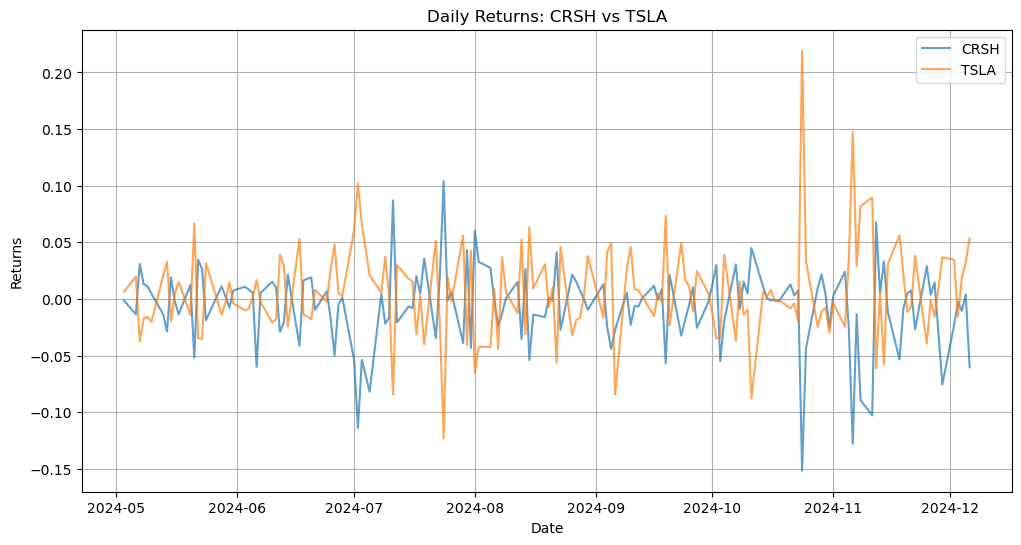

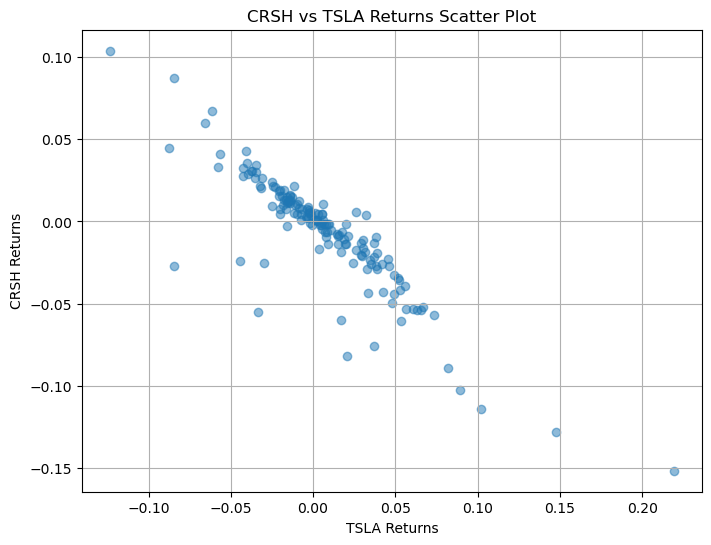

In [4]:
# Plot returns
plt.figure(figsize=(12, 6))
plt.plot(returns.index, returns['CRSH'], label='CRSH', alpha=0.7)
plt.plot(returns.index, returns['TSLA'], label='TSLA', alpha=0.7)
plt.title('Daily Returns: CRSH vs TSLA')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.show()

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(returns['TSLA'], returns['CRSH'], alpha=0.5)
plt.xlabel('TSLA Returns')
plt.ylabel('CRSH Returns')
plt.title('CRSH vs TSLA Returns Scatter Plot')
plt.grid(True)

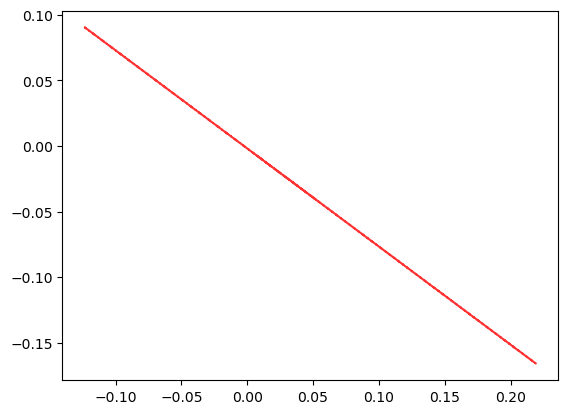


Regression Results:
                            OLS Regression Results                            
Dep. Variable:                   CRSH   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     515.1
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           3.27e-50
Time:                        19:57:01   Log-Likelihood:                 405.26
No. Observations:                 151   AIC:                            -806.5
Df Residuals:                     149   BIC:                            -800.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0019      0.00

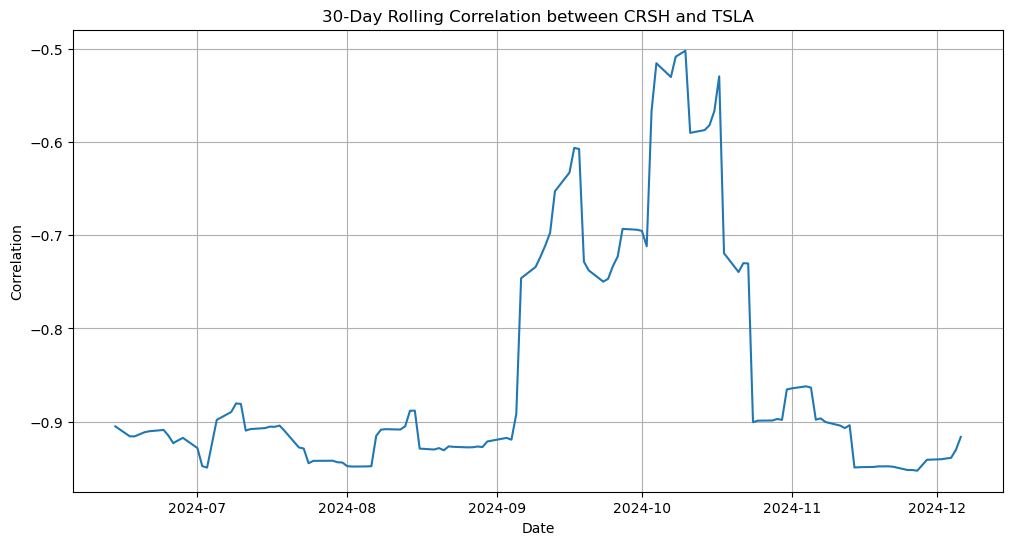

In [5]:
# Add regression line
z = np.polyfit(returns['TSLA'], returns['CRSH'], 1)
p = np.poly1d(z)
plt.plot(returns['TSLA'], p(returns['TSLA']), "r--", alpha=0.8)
plt.show()

# Calculate beta using regression
X = sm.add_constant(returns['TSLA'])
model = sm.OLS(returns['CRSH'], X).fit()
print("\nRegression Results:")
print(model.summary())

# Calculate rolling correlation (30-day window)
rolling_corr = returns['CRSH'].rolling(window=30).corr(returns['TSLA'])

# Plot rolling correlation
plt.figure(figsize=(12, 6))
plt.plot(rolling_corr.index, rolling_corr)
plt.title('30-Day Rolling Correlation between CRSH and TSLA')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

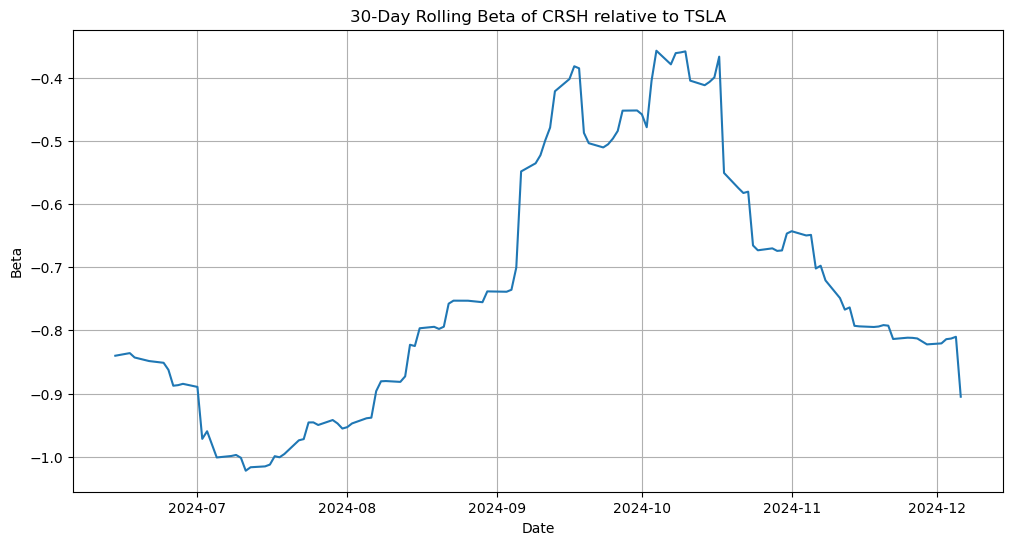

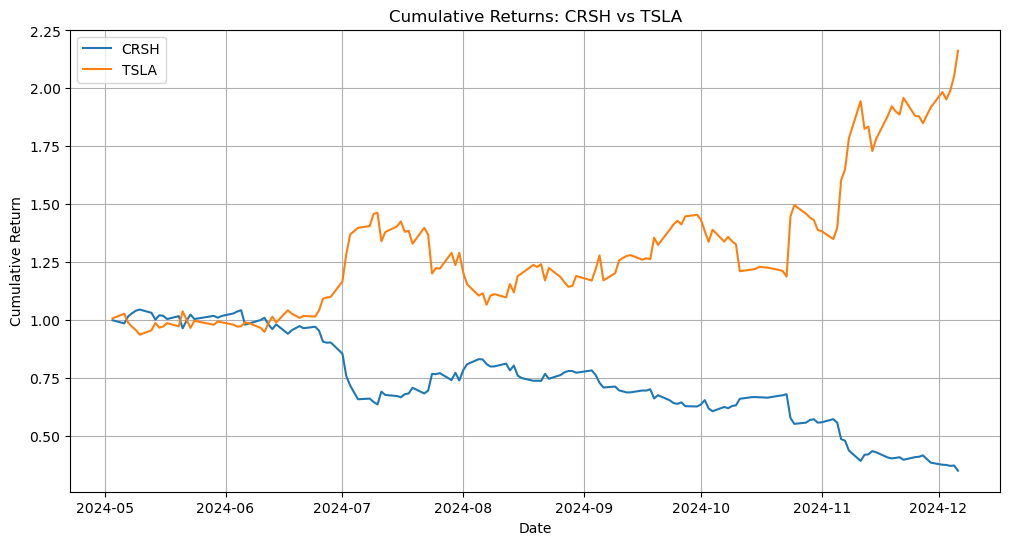

In [6]:
# Calculate rolling beta (30-day window)
def rolling_beta(x, y, window):
    ret = pd.DataFrame({'x': x, 'y': y})
    ret = ret.dropna()
    
    beta = pd.Series(index=ret.index)
    for i in range(window-1, len(ret)):
        slice_x = ret['x'].iloc[i-window+1:i+1]
        slice_y = ret['y'].iloc[i-window+1:i+1]
        beta.iloc[i] = np.cov(slice_x, slice_y)[0,1] / np.var(slice_x)
    
    return beta

rolling_beta_series = rolling_beta(returns['TSLA'], returns['CRSH'], 30)

# Plot rolling beta
plt.figure(figsize=(12, 6))
plt.plot(rolling_beta_series.index, rolling_beta_series)
plt.title('30-Day Rolling Beta of CRSH relative to TSLA')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.grid(True)
plt.show()

# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns.index, cumulative_returns['CRSH'], label='CRSH')
plt.plot(cumulative_returns.index, cumulative_returns['TSLA'], label='TSLA')
plt.title('Cumulative Returns: CRSH vs TSLA')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()